<a href="https://colab.research.google.com/github/MajedKawa/Clustering-Images/blob/main/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import confusion_matrix
from sklearn.cluster import DBSCAN


# Load Fashion MNIST dataset
test_df, train_df = pd.read_csv('fashion-mnist_test.csv'), pd.read_csv('fashion-mnist_train.csv')
# Each row represents an image, the first column is the label (class), and the remaining 784 columns are the pixel values of the 28x28 grayscale image.
# Check for NaN values in the training data
print(f"Number of NaN values in train data: {np.isnan(train_df).sum().sum()}")

# Check for NaN values in the test data
print(f"Number of NaN values in test data: {np.isnan(test_df).sum().sum()}")

Number of NaN values in train data: 0
Number of NaN values in test data: 0


There are no NaN values in the data.

In [2]:
# Separate features (pixel values) and labels(first columns)
x_train, y_train, x_test, y_test = train_df.iloc[:, 1:].values, train_df.iloc[:, 0].values, test_df.iloc[:, 1:].values, test_df.iloc[:, 0].values

In [3]:
# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

PCA for dimensionality reduction before clustering.

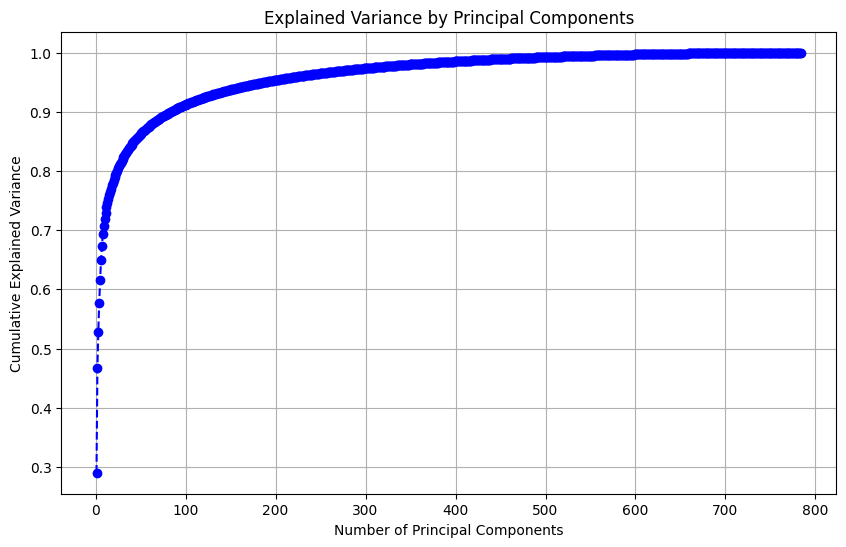

In [4]:
# Perform PCA without reducing dimensions
pca = PCA()
pca.fit(x_train)

# Calculate cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)

In [5]:
# Apply PCA
n_components = 50
pca = PCA(n_components=n_components)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Check explained variance
print(f"Explained variance ratio: {np.sum(pca.explained_variance_ratio_)}")

Explained variance ratio: 0.8625451922416687


In [6]:
# Perform K-Means clustering
n_clusters = 10  # Number of categories in Fashion-MNIST
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(x_train_pca)

# Evaluate clustering performance
ari = adjusted_rand_score(y_train, clusters) # ARI ranges from -1 to 1, where 1 indicates perfect agreement between true labels, and the clustering results
nmi = normalized_mutual_info_score(y_train, clusters) # NMI ranges from 0 to 1, where 1 indicates perfect agreement.
print(f"Adjusted Rand Index: {ari}")
print(f"Normalized Mutual Information: {nmi}")

Adjusted Rand Index: 0.36669977324014896
Normalized Mutual Information: 0.4990627282866016


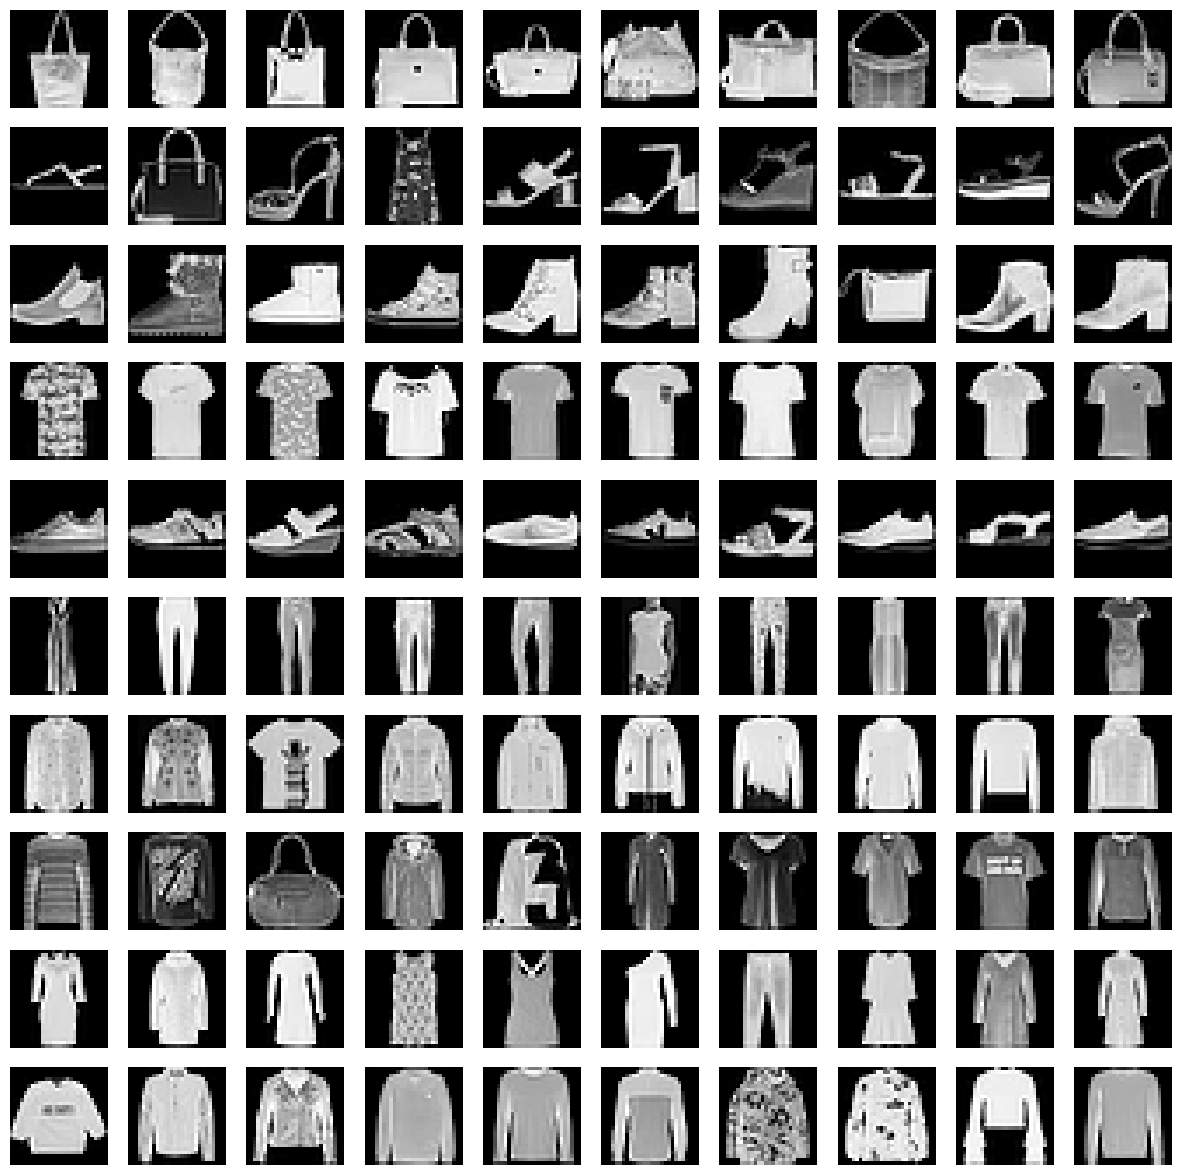

In [7]:
# Plot samples from each cluster
fig, axes = plt.subplots(n_clusters, 10, figsize=(15, 15))
for cluster in range(n_clusters):
    cluster_samples = x_train[clusters == cluster][:10]  # Get 10 samples per cluster
    for i, sample in enumerate(cluster_samples):
        axes[cluster, i].imshow(sample.reshape(28, 28), cmap='gray')
        axes[cluster, i].axis('off')
plt.show()

In [8]:
# Create a DataFrame to analyze cluster composition
cluster_df = pd.DataFrame({'Cluster': clusters, 'True Label': y_train})

# Count the number of samples from each true label in each cluster
cluster_composition = cluster_df.groupby(['Cluster', 'True Label']).size().unstack(fill_value=0)
print(cluster_composition)

True Label     0     1     2     3     4     5     6     7     8     9
Cluster                                                               
0             21     0    29     6    29    13    21     0  2520     3
1            359   102   338   334   160  4157   516   692   373   210
2              1     0     4     1     4   470     7   331  1413  5111
3           3021     9    29    78     7     0   665     0     8     0
4              7     0     4     0     1  1301     9  4977   590   577
5             52  5177     8  1960    49     0    22     0     8     1
6             65    57  1940    95  3143     0  1312     0    50    10
7           1702   172  1776   751   941    56  2114     0   455    67
8            626   459    60  2755   776     3   449     0    42    13
9            146    24  1812    20   890     0   885     0   541     8


In [9]:
dbscan = DBSCAN(eps=3, min_samples=15)
clusters = dbscan.fit_predict(x_train_pca)  # Use PCA-reduced data

# Evaluate clustering
ari = adjusted_rand_score(y_train, clusters)
nmi = normalized_mutual_info_score(y_train, clusters)
print(f"Adjusted Rand Index (PCA + DBSCAN): {ari}")
print(f"Normalized Mutual Information (PCA + DBSCAN): {nmi}")

Adjusted Rand Index (PCA + DBSCAN): 0.004758213593377009
Normalized Mutual Information (PCA + DBSCAN): 0.02613048335638095
